# ------------    matrix plots    ------------
    # We'll learn how to create matrix plots (primarily heatmaps) in Seaborn.

In [1]:
# import libraries
import seaborn as sns
# shows figures in ipynb
%matplotlib inline

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lets load a builtin dataset of seaborn. we import 2 datasets: 'tips' and 'flights'
    # tips: a dataset of restaurant patrons' tipping behavior
    # flights: shows the number of passengers for each month of given years
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# --------    heatmap    --------
    # heatmap : primary way of showing the matrix plots
    # in order to work with heatmap, our data need to be in "matrix form"
    # "index name" and "column name" should match up so that 
    #       the "cell value" indicates something relavant to both of those index name and column name

## matrix form
    # consider "tips" dataframe. Variables (columns and row index) needs to be same
    # we can use many methods
        # 1. through a pivot table
        # 2. Getting correlation data

### ----  using correlation  ----

In [4]:
tc = tips.corr()     # notice the same variable names in the column and row
print(tc)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<AxesSubplot:>

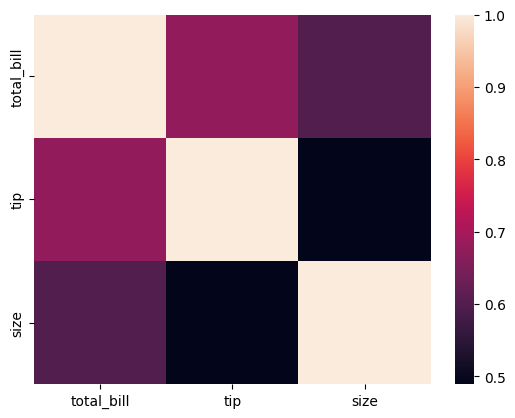

In [5]:
# creating heatmap
sns.heatmap(tc)
# it just color those values based on some gradient scales
# it helps to compare relative values of a correlation

<AxesSubplot:>

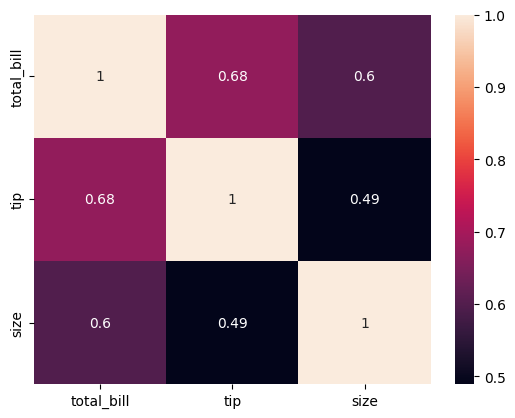

In [6]:
# annotations (show the values)
sns.heatmap(tc, annot=True)

<AxesSubplot:>

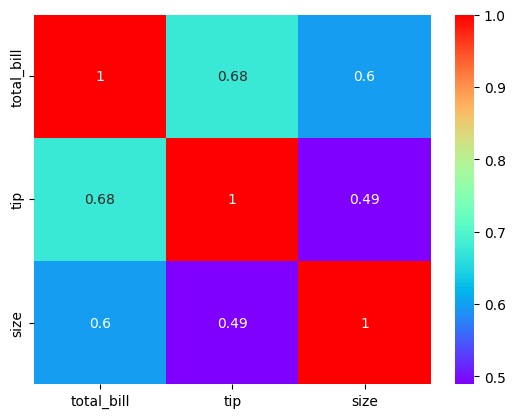

In [7]:
# setting colormap
sns.heatmap(tc, annot=True, cmap='rainbow')

### ----  using Pivot  ----

In [4]:
# Pivot: use pivot table for Flight data. We transform this data as below: 
    # set "month" is the "index"
    # set "year" as "columns"
    # set number of passengers as "values"
flPv = flights.pivot_table(index='month', columns='year', values='passengers')
flPv    # notice the correlation

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

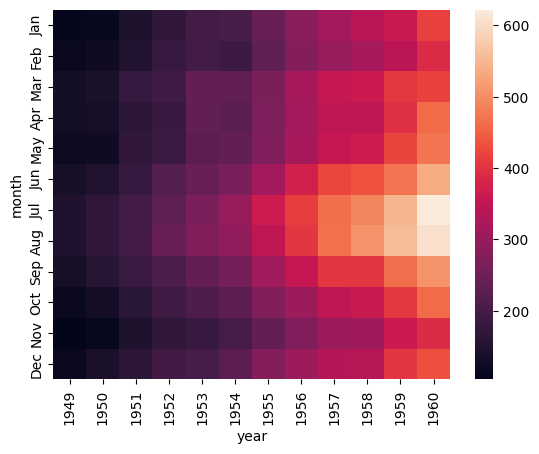

In [6]:
# heatmap
sns.heatmap(flPv)
# notice as the year increase, there's more flight
# also notice the popular months are the summer months: June, July, August

<AxesSubplot:xlabel='year', ylabel='month'>

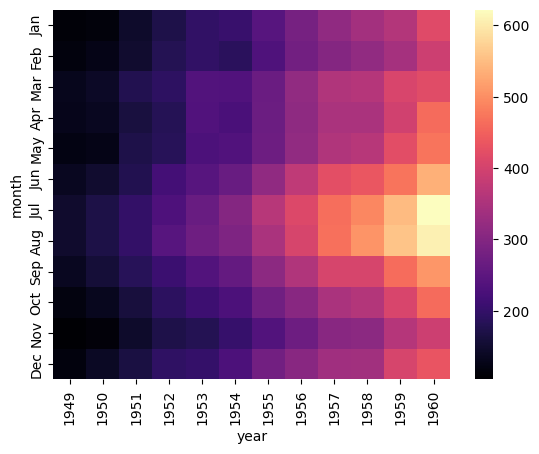

In [7]:
# change color map "cmap"
sns.heatmap(flPv, cmap='magma')

<AxesSubplot:xlabel='year', ylabel='month'>

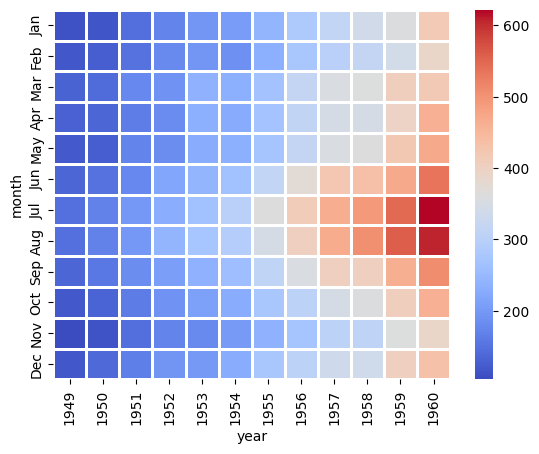

In [8]:
# to seperate the squares: linecolor, linewidth
sns.heatmap(flPv, cmap='coolwarm', linecolor='white', linewidth=1)

___

# --------    clustermap    --------
    # The clustermap uses "hierarchal clustering" to produce a clustered version of the heatmap.

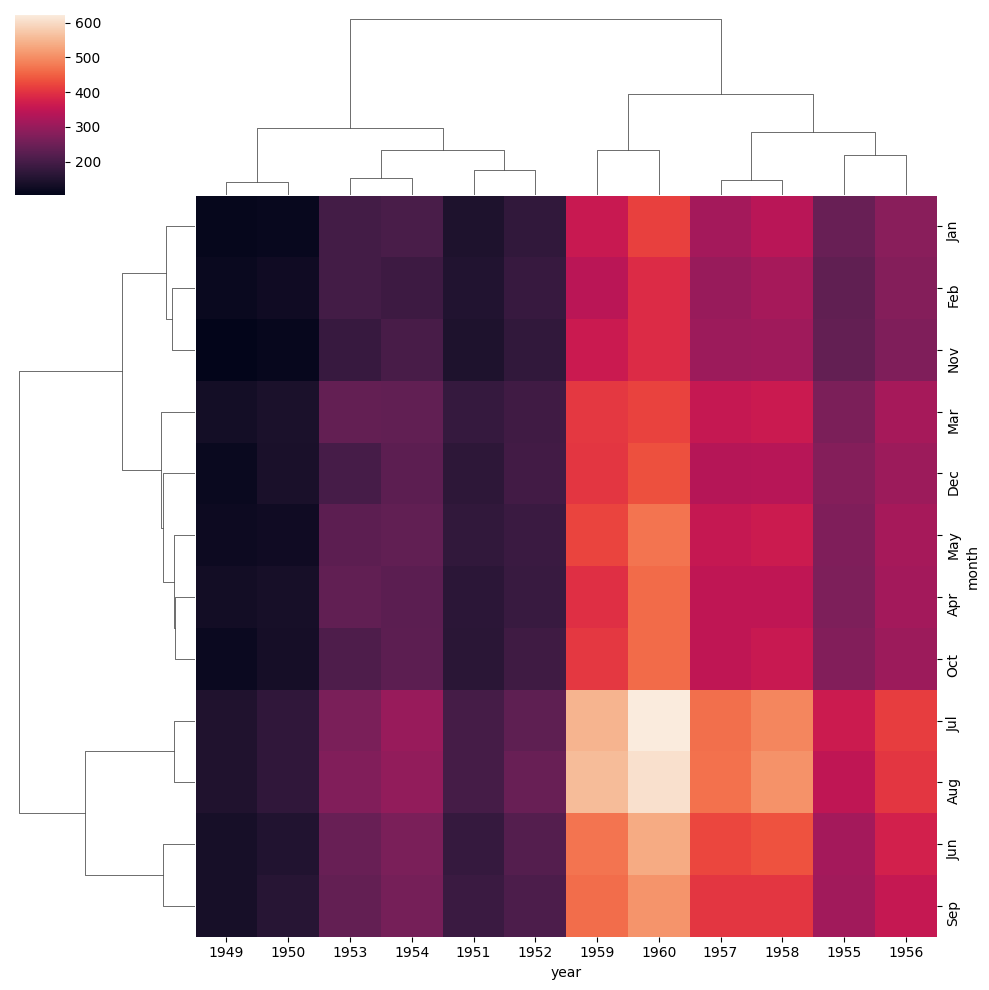

In [10]:
sns.clustermap(flPv)

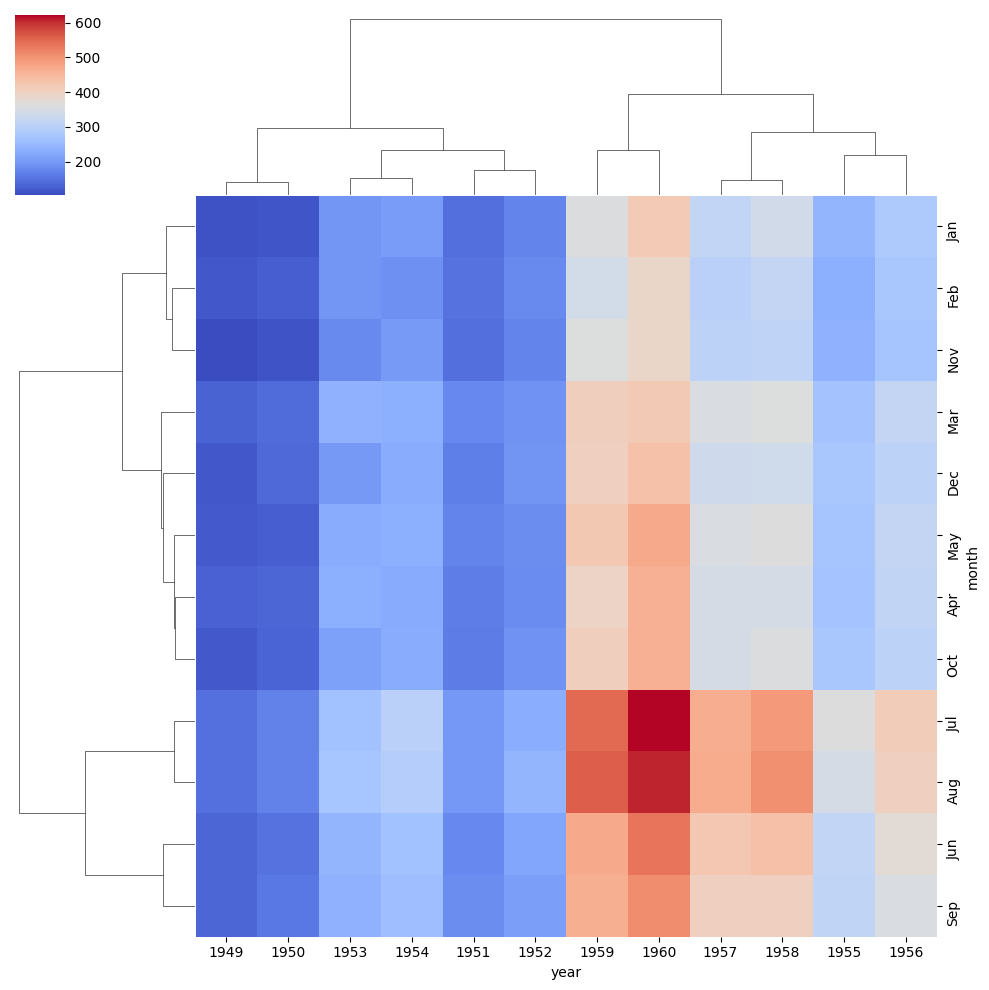

In [6]:
# Notice that the years and months are now grouped by "passenger count" similarity rather than being in order. 
# For example, August and July are similar, which makes sense as both are summer travel months

# cluster columns and rows togather based of their similarity
# notice the "years" axis and "month" axis.
# notice the months/years are not in order: 
#   months with nearby values (passengers) are grouped first then paires are grouped and so on
#   i.e. they're clustured by months with similar values
#   same goes for "year"
# Eg: 1959 and 1960 are similar and "april" and "july"

# change colormap
sns.clustermap(flPv, cmap="coolwarm")

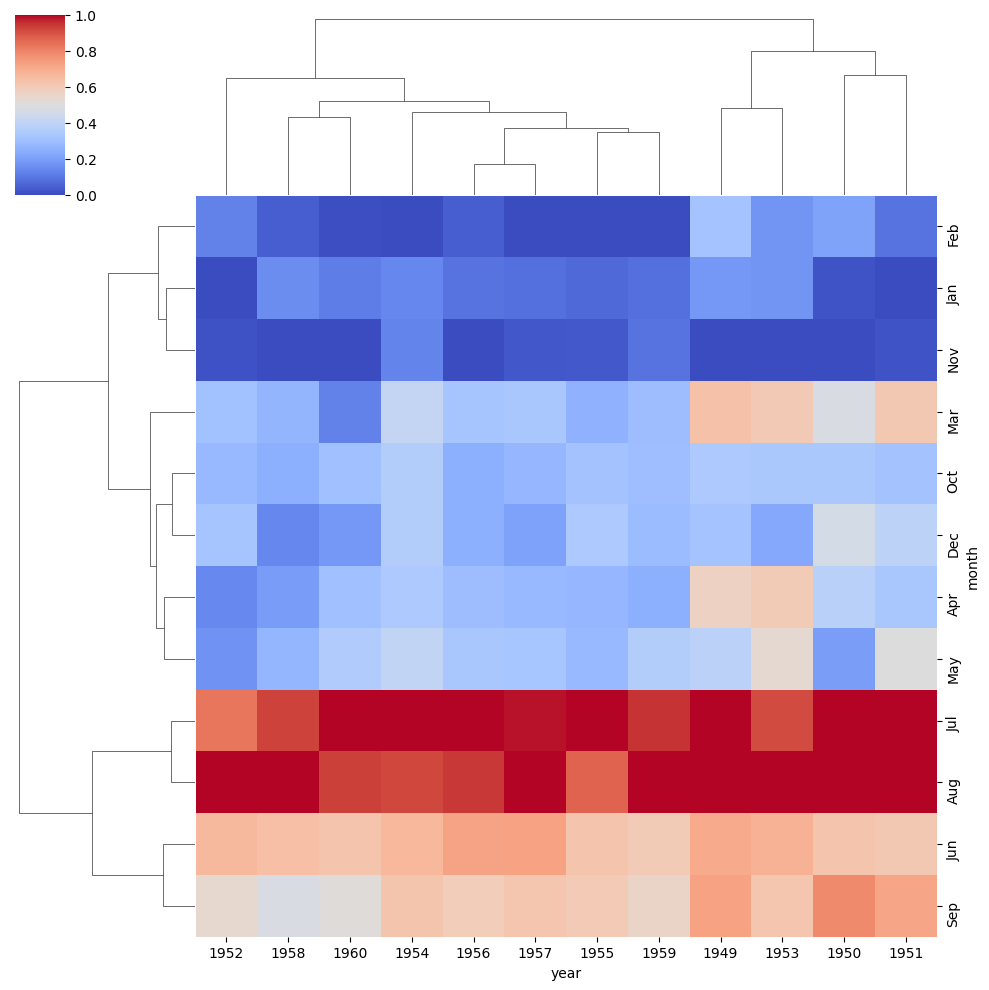

In [8]:
# view similarities in normalized scale
sns.clustermap(flPv, cmap="coolwarm", standard_scale=1)
# notice winter moths has low passengers, summer months has more passengers

___

# ------------    Grids    ------------
    # Use sns grid capability to automate subplots based on features on our data
    # Grids are plots that let you organize different types of plots into rows and columns, 
        # making it easy to create similar plots grouped by specific features.

In [1]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
# shows figures in ipynb
%matplotlib inline

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# "iris" dataset: Measurments of different flowers
    # Iris is a genus of 310 flowering plant species known for their vibrant flowers. 
    # The term "iris" is used both as the scientific and common name for all species in this genus.

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# last column of the dataset is for 3-different species
iris['species'].unique()
# other four columns are just features of the flower

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## ----  pairplot  ----
    # it's just the automated jointplot for the dataset
    # just pass the DataFrame, the plot will autometically created

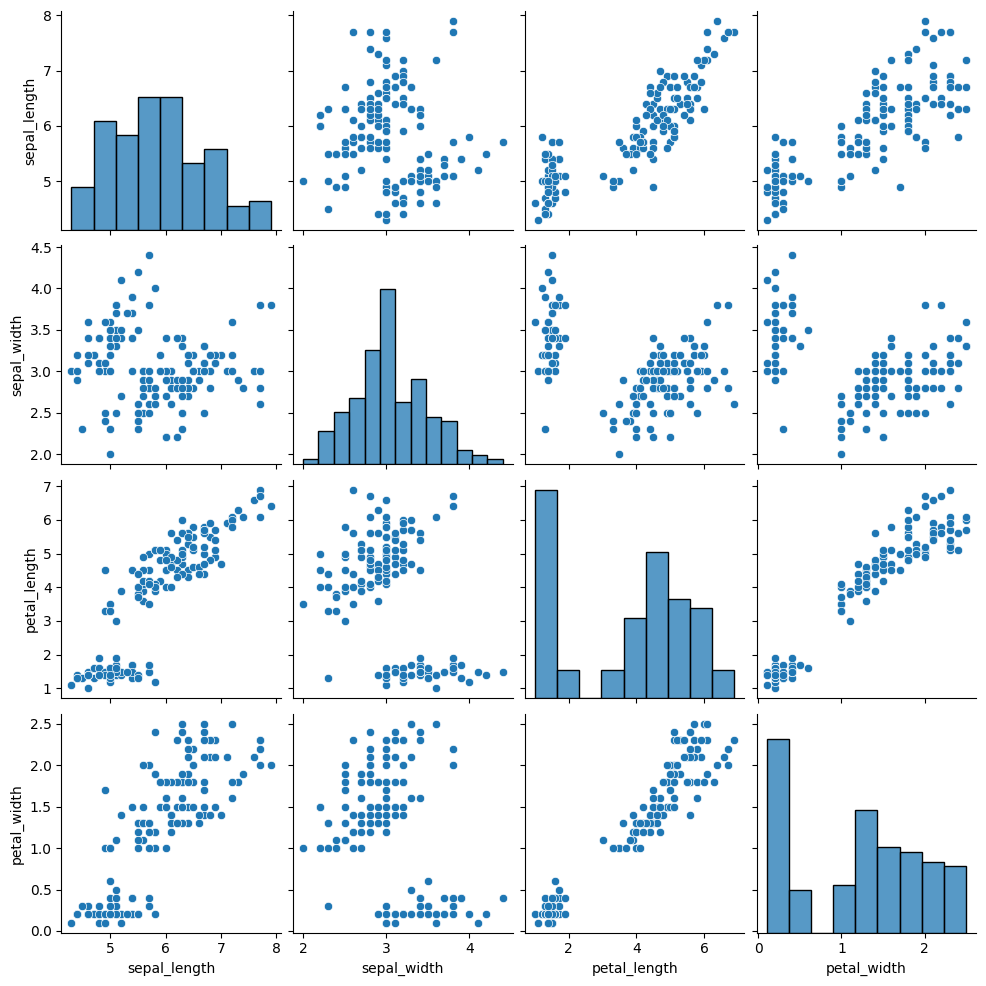

In [4]:
sns.pairplot(iris)

## ----  PairGrid  ----
    # pairplot is just simplified version of PairGrid
        # use PairGrid to modify the plots more
        # takes all the numerical columns and grid them up
        # makes a kind of subplots

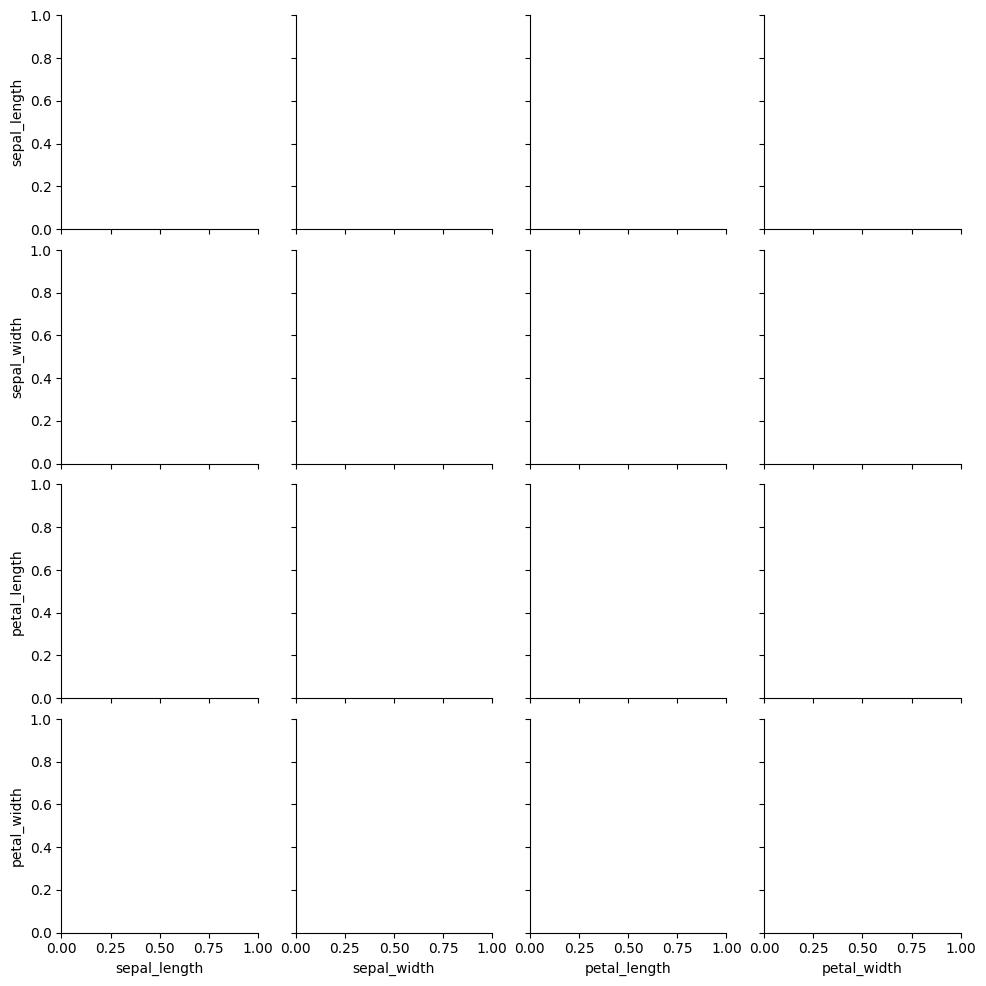

In [4]:
sns.PairGrid(iris)  # takes all the numerical columns and grid them up

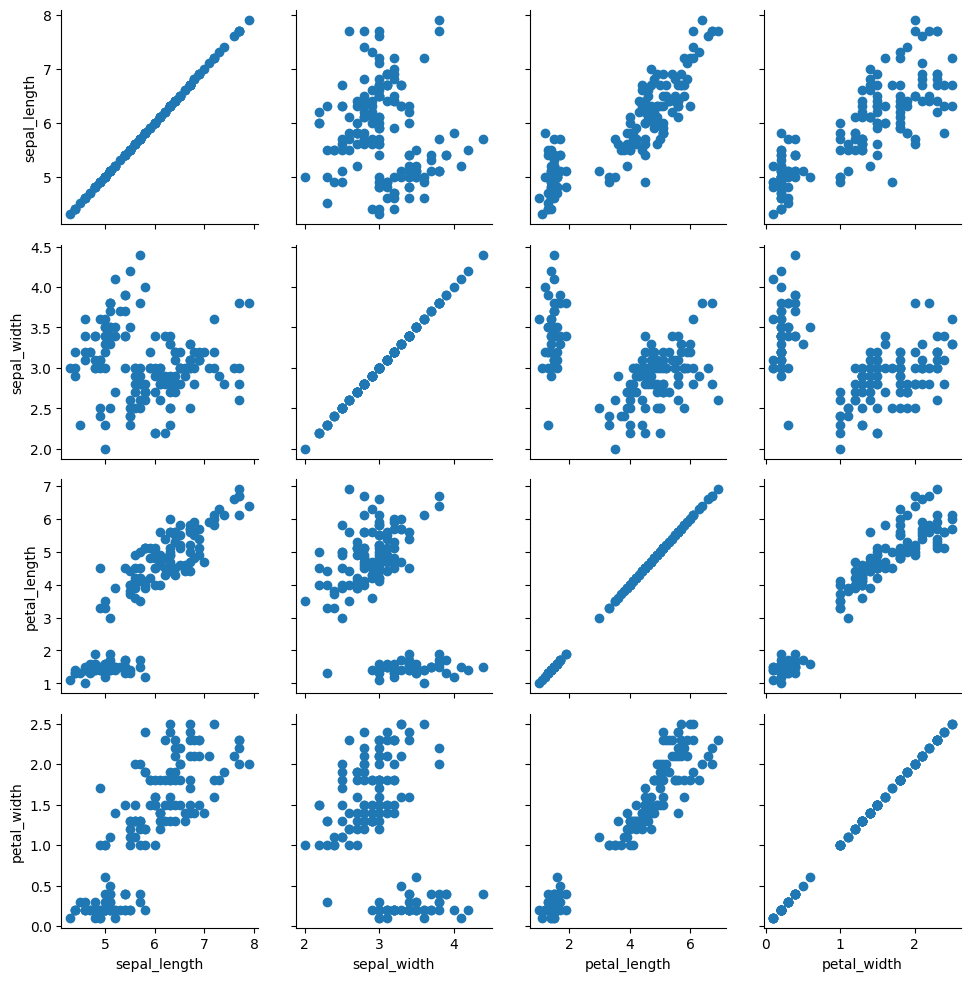

In [5]:
# map scatter-plot using PairGrid
g = sns.PairGrid(iris)
g.map(plt.scatter)